Classiying Resistance by Origin

Here is a pie chart showing the distribution of antibiotic resistance occurrences grouped by Origin. It summarizes how frequently resistant ("R") results appear across all antibiotics for each origin in the dataset.

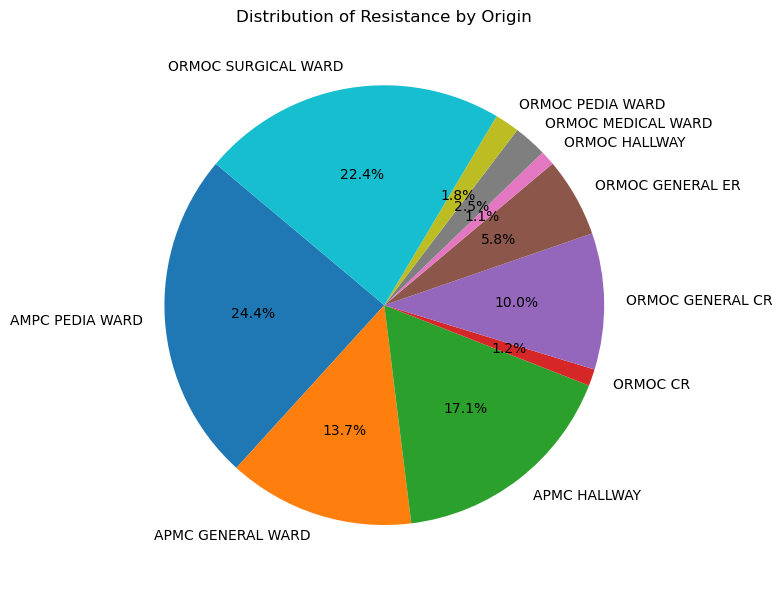

In [85]:
import matplotlib.pyplot as plt

# Clean column names by stripping whitespaces and newlines
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace('\r', '')

# Filter only resistance data: those columns with R/S values
resistance_cols = df.columns[4:]  # first 4 columns are Sample_ID, Origin, Bacteria, Unnamed
resistance_data = df[resistance_cols]

# Create a mask for resistant values
resistant_mask = resistance_data == 'R'

# Add Origin to the resistance mask for grouping
resistant_mask['Origin'] = df['Origin']

# Sum resistant counts per origin
resistance_by_origin = resistant_mask.groupby('Origin').sum().sum(axis=1)

# Plotting
plt.figure(figsize=(10, 6))
resistance_by_origin.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Resistance by Origin')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [86]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_excel("/Users/User/Downloads/AMR_merged_all_samples_ordered.xlsx")
df = df.dropna(axis=1, how='all').dropna(axis=0, how='all')

# Define resistance columns and convert R/S to binary
resistance_columns = df.columns[4:]
origins = df['Origin'].unique()

def convert_rs(val):
    if val == 'R': return 1
    if val == 'S': return 0
    return None

# Compute metrics
summary = []
for origin in origins:
    subset = df[df['Origin'] == origin]
    for abx in resistance_columns:
        values = subset[abx].map(convert_rs).dropna()
        if values.nunique() == 2:  # Ensure both 0 and 1 exist
            y_true = values.astype(int)
            y_pred = [1] * len(y_true)  # Naive model predicts all Resistant
            precision = precision_score(y_true, y_pred, zero_division=0)
            recall = recall_score(y_true, y_pred, zero_division=0)
            f1 = f1_score(y_true, y_pred, zero_division=0)
            summary.append({
                'Origin': origin,
                'Antibiotic': abx,
                'Precision': precision,
                'Recall': recall,
                'F1 Score': f1
            })

# Create summary DataFrame
summary_df = pd.DataFrame(summary)
summary_df

,Origin,Antibiotic,Precision,Recall,F1 Score
0,APMC HALLWAY,+Amoxicillin,0.714286,1.0,0.833333
1,APMC HALLWAY,+Azithromycin,0.750000,1.0,0.857143
2,APMC HALLWAY,+Cefotaxime,0.236842,1.0,0.382979
3,APMC HALLWAY,+Kanamycin,0.750000,1.0,0.857143
4,APMC HALLWAY,Amoxicillin/Clavulanic Acid,0.828571,1.0,0.906250
...,...,...,...,...,...
124,ORMOC SURGICAL WARD,Clindamycin,0.500000,1.0,0.666667
125,ORMOC SURGICAL WARD,Erythromycin,0.166667,1.0,0.285714
126,ORMOC SURGICAL WARD,Nitrofurantoin,0.386364,1.0,0.557377
127,ORMOC SURGICAL WARD,Trimethoprim/ Sulfamethoxazole,0.235294,1.0,0.380952


C:\Users\User\AppData\Local\Temp\ipykernel_8560\1470558640.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded = X.replace({'R': 1, 'S': 0, 'I': 0.5, '+': 1, '-': 0}).fillna(-1).astype(float)
C:\Users\User\Documents\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\Documents\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

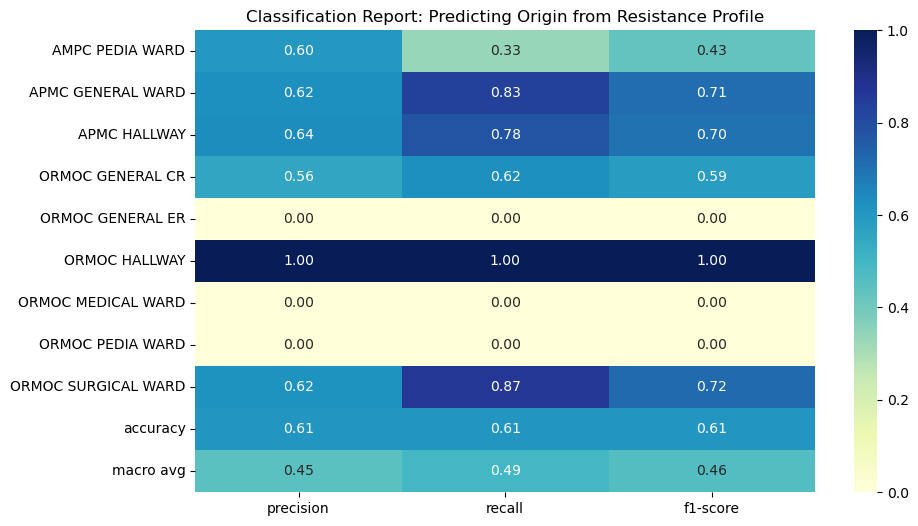

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_excel("/Users/User/Downloads/AMR_merged_all_samples_ordered.xlsx")
df = df.loc[:, ~df.columns.str.contains('^Unnamed|nan', na=False)].dropna(axis=1, how='all')

# 2. Extract features and target
X = df.drop(columns=["Sample_ID", "Origin", "Bacteria"])
y = df["Origin"]

# 3. Encode resistance: R=1, S=0, I=0.5, +=1, -=0, NaN=-1
X_encoded = X.replace({'R': 1, 'S': 0, 'I': 0.5, '+': 1, '-': 0}).fillna(-1).astype(float)

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)

# 5. Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 6. Evaluate model
y_pred = clf.predict(X_test)
report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

# 7. Visualize results
plt.figure(figsize=(10, 6))
sns.heatmap(report.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report: Predicting Origin from Resistance Profile")
plt.show()


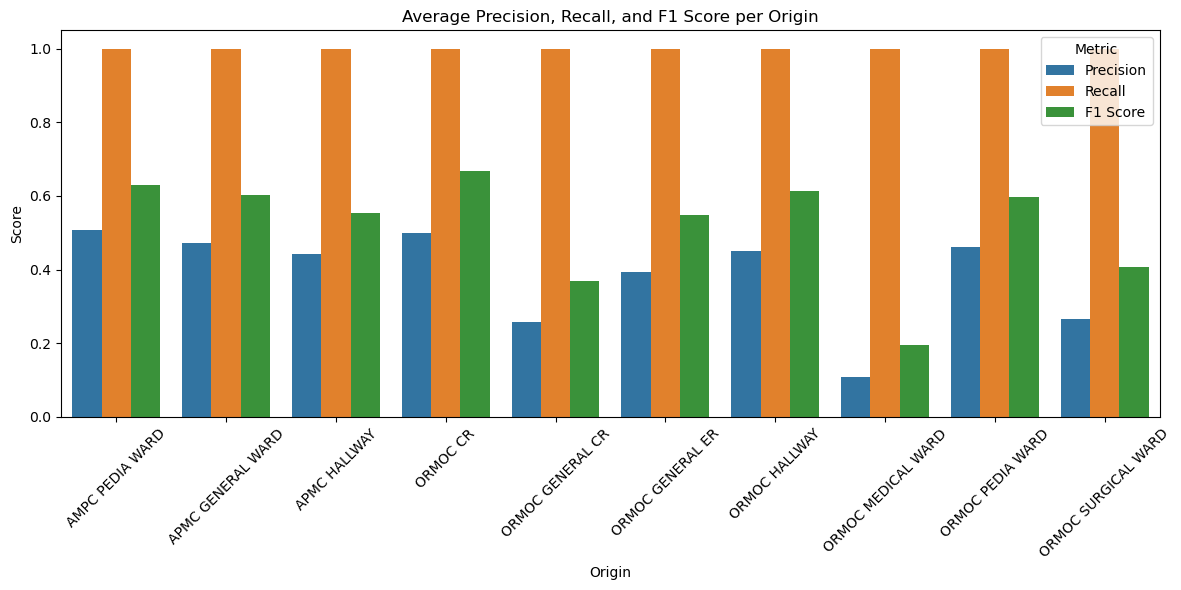

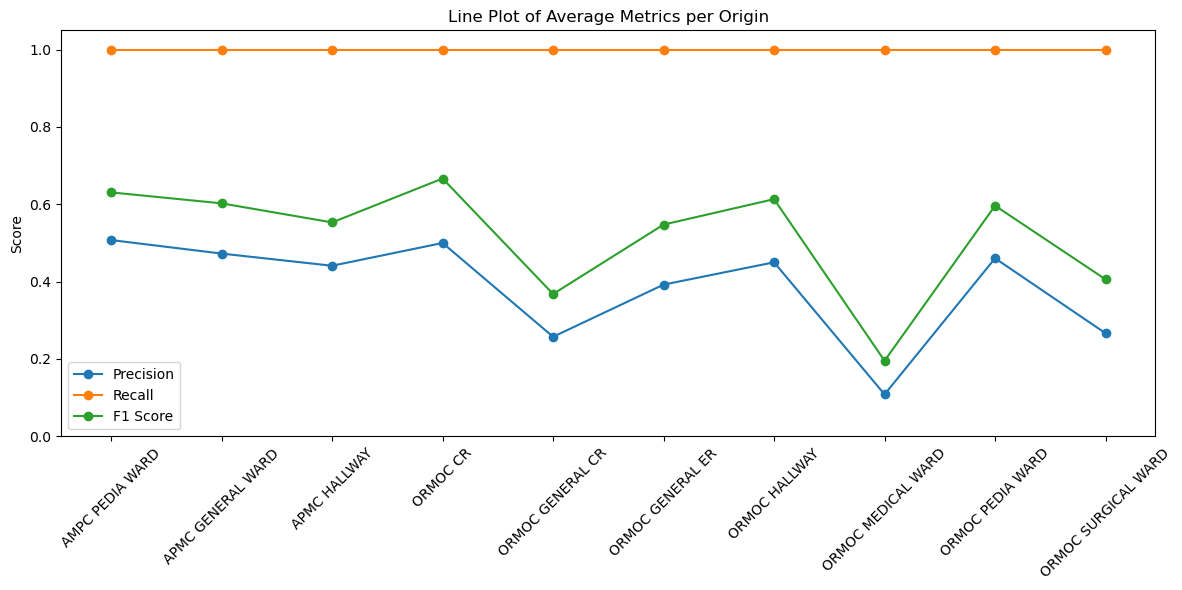

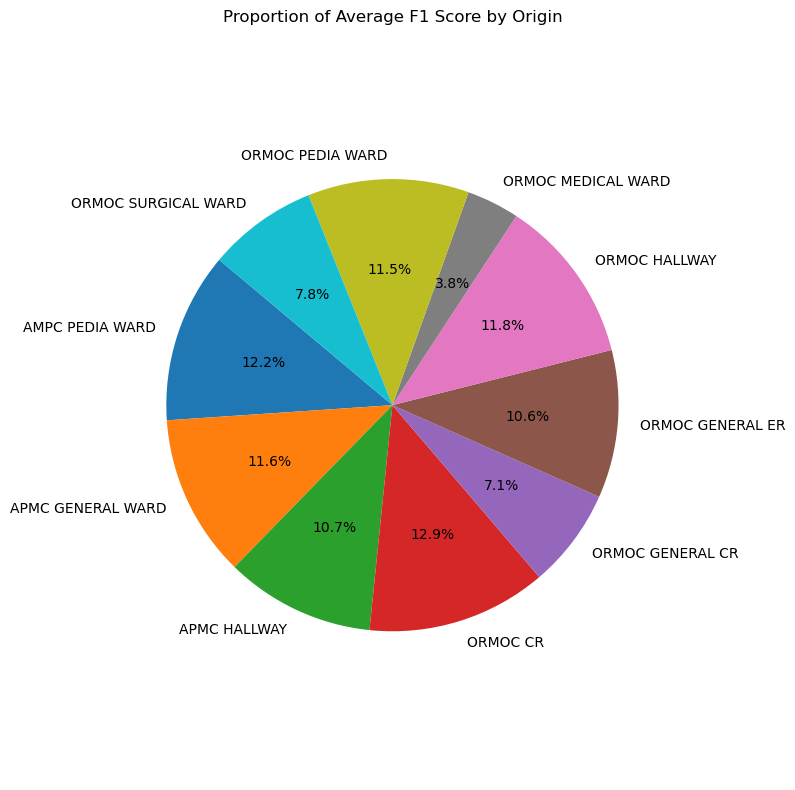

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

# Load and clean the data
df = pd.read_excel("/Users/User/Downloads/AMR_merged_all_samples_ordered.xlsx")
df = df.dropna(axis=1, how='all').dropna(axis=0, how='all')

# Identify resistance columns
resistance_columns = df.columns[4:]  # Adjust index if needed
origins = df['Origin'].dropna().unique()

# Helper to convert R/S to binary
def convert_rs(val):
    if val == 'R': return 1
    if val == 'S': return 0
    return None

# Compute metrics per Origin and Antibiotic
summary = []
for origin in origins:
    subset = df[df['Origin'] == origin]
    for abx in resistance_columns:
        values = subset[abx].map(convert_rs).dropna()
        if values.nunique() == 2:
            y_true = values.astype(int)
            y_pred = [1] * len(y_true)
            precision = precision_score(y_true, y_pred, zero_division=0)
            recall = recall_score(y_true, y_pred, zero_division=0)
            f1 = f1_score(y_true, y_pred, zero_division=0)
            summary.append({
                'Origin': origin,
                'Antibiotic': abx,
                'Precision': precision,
                'Recall': recall,
                'F1 Score': f1
            })

# Convert to DataFrame
summary_df = pd.DataFrame(summary)

# --- Visualization ---
# Group by Origin and calculate average metrics
origin_avg = summary_df.groupby('Origin')[['Precision', 'Recall', 'F1 Score']].mean().reset_index()

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=origin_avg.melt(id_vars='Origin', var_name='Metric', value_name='Score'),
            x='Origin', y='Score', hue='Metric')
plt.title('Average Precision, Recall, and F1 Score per Origin')
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

# Line Chart
plt.figure(figsize=(12, 6))
for metric in ['Precision', 'Recall', 'F1 Score']:
    plt.plot(origin_avg['Origin'], origin_avg[metric], marker='o', label=metric)
plt.title('Line Plot of Average Metrics per Origin')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.show()

# Pie Chart for F1 Score
plt.figure(figsize=(8, 8))
plt.pie(origin_avg['F1 Score'], labels=origin_avg['Origin'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Average F1 Score by Origin')
plt.axis('equal')
plt.tight_layout()
plt.show()


Below is a summary of all sample origins, including the number of tests conducted and the corresponding resistance to antibiotics.

AMPC PEDIA WARD SUMMARY

In [89]:
import pandas as pd

# Load the dataset
df = pd.read_excel("/Users/User/Downloads/AMR_merged_all_samples_ordered.xlsx")

# Standardize column names
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace(r'\s+', ' ', regex=True)

# Filter hallway rows (adjust the filter based on actual content!)
df_hallway = df[df['Origin'].str.contains("PEDIA WARD", case=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_hallway.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_hallway[antibiotic_cols_all].apply(lambda col: col.map(lambda x: 1 if x == 'R' else 0))

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_hallway[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
pediaward_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Display or save
print(pediaward_full_summary)

                          Bacteria  Isolates Count  +Amoxicillin  \
0  Acinetobacter baumannii complex               2             0   
1     Enterobacter cloacae complex              20             0   
2            Enterococcus faecalis               2             0   
3             Enterococcus faecium               1             0   
4                 Escherichia coli               1             0   
5  Klebsiella pneumoniae ssp pneum              14             0   
6           Pseudomonas aeruginosa               4             0   
7                   Salmonella spp               1             0   
8            Staphylococcus aureus               3             3   

   +Azithromycin  +Cefotaxime  +Ceftaroline  +Ceftazidime  \
0              0            0             0             0   
1              0            0             0             0   
2              0            2             0             2   
3              0            1             0             1   
4             

C:\Users\User\AppData\Local\Temp\ipykernel_8560\1320640496.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)


<Figure size 1400x800 with 0 Axes>

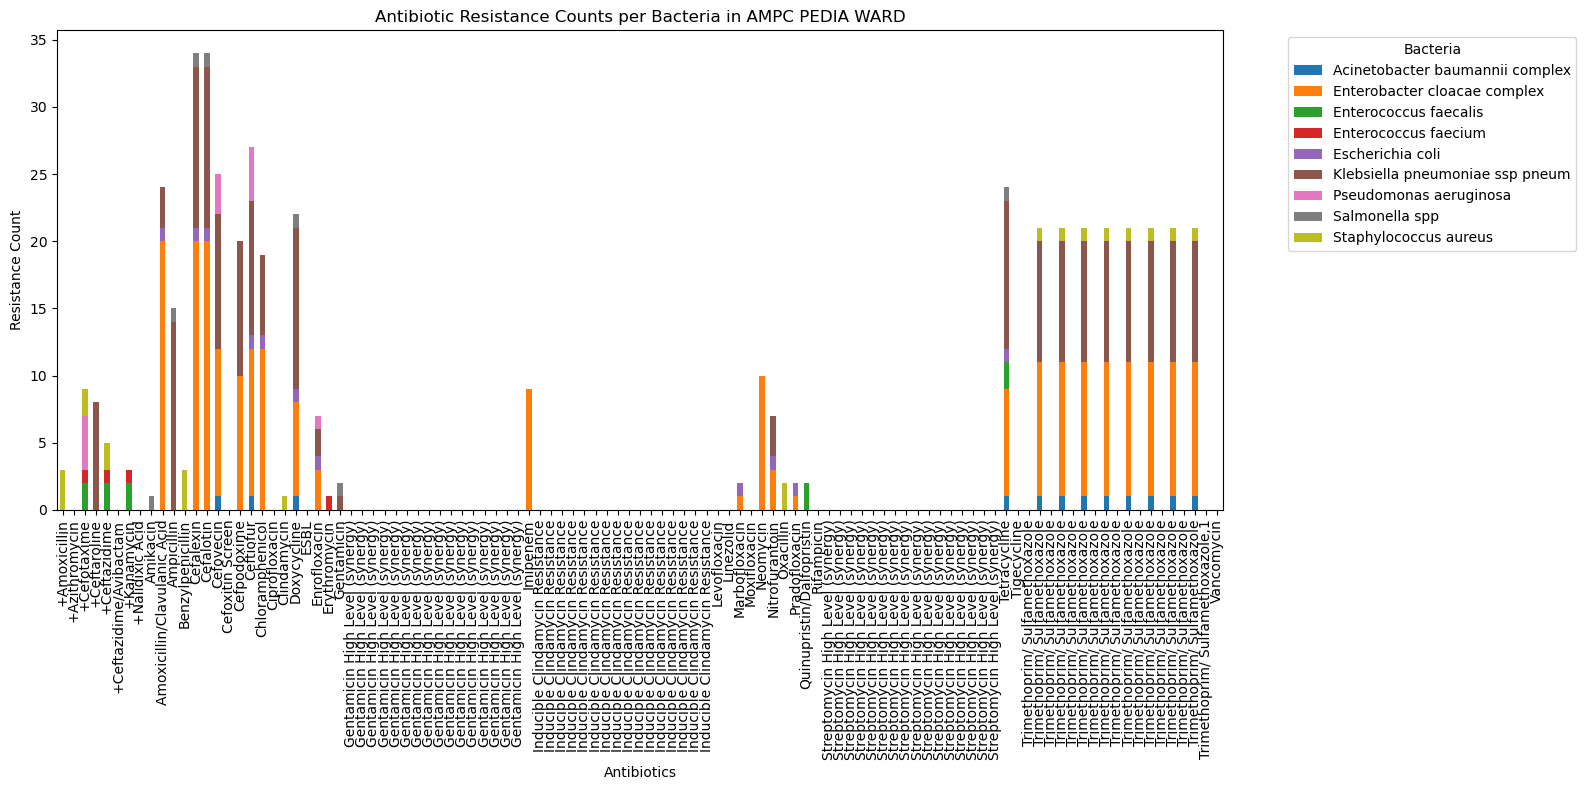

In [109]:
# Re-using the data previously loaded and cleaned for consistency
# Filter rows for "AMPC PEDIA WARD"
df_pedia = df[df['Origin'].str.contains("PEDIA WARD", case=False, na=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_pedia.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_pedia[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
pediaward_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Plotting: Resistance count per bacteria (stacked bar chart)
plt.figure(figsize=(14, 8))
pediaward_full_summary.set_index('Bacteria')[antibiotic_cols_all].T.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('Antibiotic Resistance Counts per Bacteria in AMPC PEDIA WARD')
plt.xlabel('Antibiotics')
plt.ylabel('Resistance Count')
plt.legend(title='Bacteria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

AMPC HALLWAY SUMMARY

In [91]:
import pandas as pd

# Load the dataset
df = pd.read_excel("/Users/User/Downloads/AMR_merged_all_samples_ordered.xlsx")

# Standardize column names
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace(r'\s+', ' ', regex=True)

# Filter hallway rows (adjust the filter based on actual content!)
df_hallway = df[df['Origin'].str.contains("HALLWAY", case=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_hallway.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_hallway[antibiotic_cols_all].apply(lambda col: col.map(lambda x: 1 if x == 'R' else 0))

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_hallway[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
hallway_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Display or save
print(hallway_full_summary)

                          Bacteria  Isolates Count  +Amoxicillin  \
0     Enterobacter cloacae complex              29             0   
1            Enterococcus faecalis               1             0   
2             Enterococcus faecium               4             1   
3                 Escherichia coli               5             0   
4  Klebsiella pneumoniae ssp pneum               3             0   
5           Pseudomonas aeruginosa               2             0   
6            Staphylococcus aureus               3             2   
7      Staphylococcus haemolyticus               1             1   
8     Staphylococcus saprophyticus               1             1   

   +Azithromycin  +Cefotaxime  +Ceftaroline  +Ceftazidime  \
0              0            0             0             0   
1              0            1             0             1   
2              0            4             0             4   
3              0            0             0             0   
4             

C:\Users\User\AppData\Local\Temp\ipykernel_8560\403851278.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)


<Figure size 1400x800 with 0 Axes>

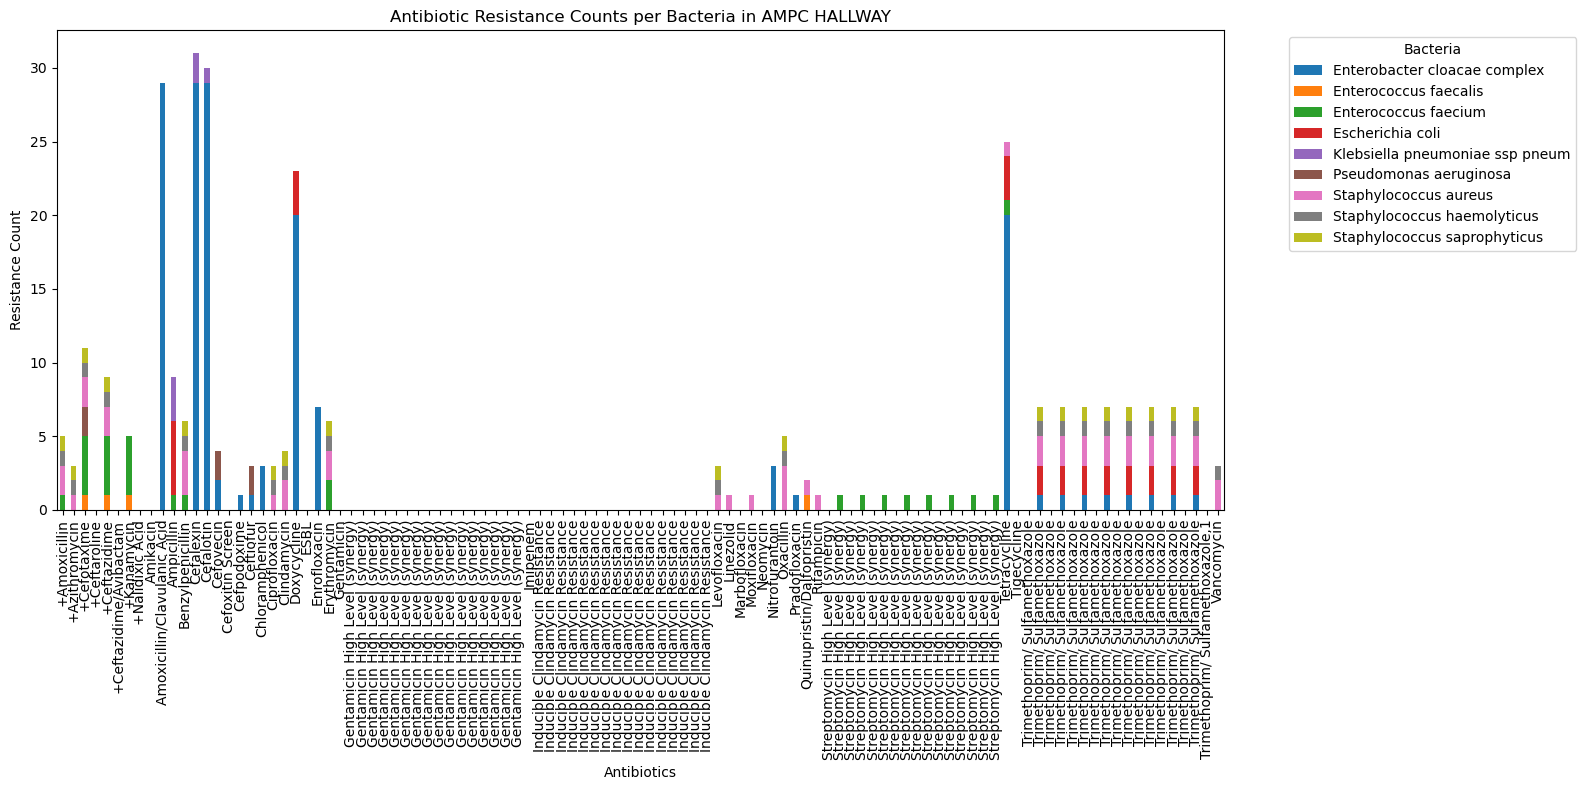

In [92]:
# Re-using the data previously loaded and cleaned for consistency
# Filter rows for "AMPC HALLWAY"
df_pedia = df[df['Origin'].str.contains("HALLWAY", case=False, na=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_pedia.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_pedia[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
hallway_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Plotting: Resistance count per bacteria (stacked bar chart)
plt.figure(figsize=(14, 8))
hallway_full_summary.set_index('Bacteria')[antibiotic_cols_all].T.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('Antibiotic Resistance Counts per Bacteria in AMPC HALLWAY')
plt.xlabel('Antibiotics')
plt.ylabel('Resistance Count')
plt.legend(title='Bacteria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


AMPC GENERAL WARD SUMMARY

In [93]:
import pandas as pd

# Load the dataset
df = pd.read_excel("/Users/User/Downloads/AMR_merged_all_samples_ordered.xlsx")

# Standardize column names
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace(r'\s+', ' ', regex=True)

# Filter hallway rows (adjust the filter based on actual content!)
df_hallway = df[df['Origin'].str.contains("GENERAL WARD", case=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_hallway.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_hallway[antibiotic_cols_all].apply(lambda col: col.map(lambda x: 1 if x == 'R' else 0))

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_hallway[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
generalward_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Display or save
print(generalward_full_summary)

                          Bacteria  Isolates Count  +Amoxicillin  \
0  Acinetobacter baumannii complex               1             0   
1     Enterobacter cloacae complex              20             0   
2            Enterococcus faecalis               1             0   
3  Klebsiella pneumoniae ssp pneum               5             0   
4           Pseudomonas aeruginosa               5             0   

   +Azithromycin  +Cefotaxime  +Ceftaroline  +Ceftazidime  \
0              0            0             0             0   
1              0            0             0             0   
2              0            1             0             1   
3              0            0             0             0   
4              0            5             0             0   

   +Ceftazidime/Avibactam  +Kanamycin  +Nalidixic Acid  ...  \
0                       0           0                0  ...   
1                       0           0                0  ...   
2                       0          

C:\Users\User\AppData\Local\Temp\ipykernel_8560\327229443.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)


<Figure size 1400x800 with 0 Axes>

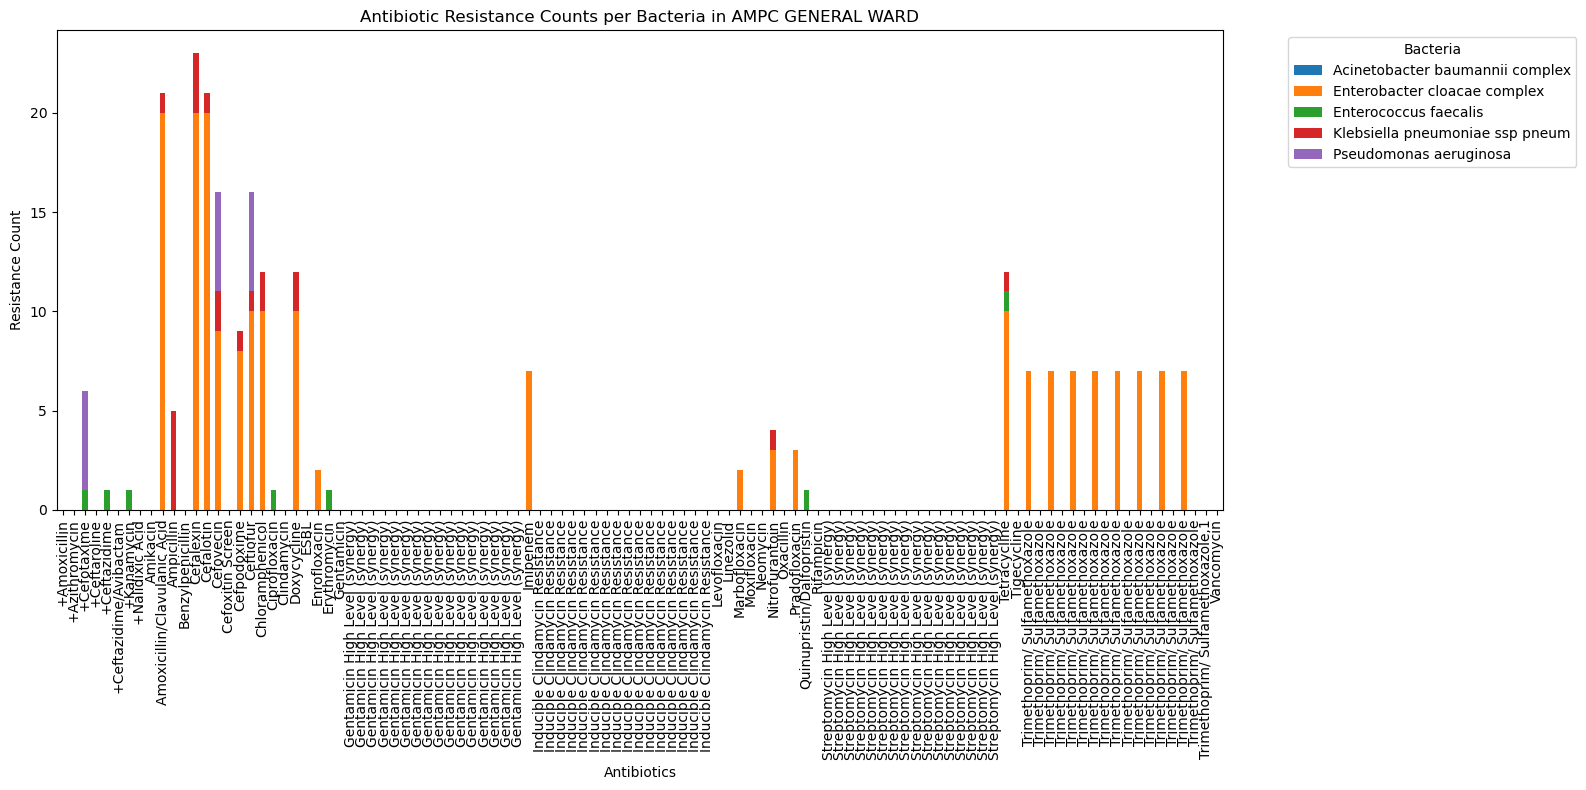

In [94]:
# Re-using the data previously loaded and cleaned for consistency
# Filter rows for "AMPC GENERAL WARD"
df_pedia = df[df['Origin'].str.contains("GENERAL WARD", case=False, na=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_pedia.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_pedia[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
generalward_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Plotting: Resistance count per bacteria (stacked bar chart)
plt.figure(figsize=(14, 8))
generalward_full_summary.set_index('Bacteria')[antibiotic_cols_all].T.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('Antibiotic Resistance Counts per Bacteria in AMPC GENERAL WARD')
plt.xlabel('Antibiotics')
plt.ylabel('Resistance Count')
plt.legend(title='Bacteria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


ORMOC GENERAL CR SUMMARY

In [95]:
import pandas as pd

# Load the dataset
df = pd.read_excel("/Users/User/Downloads/AMR_merged_all_samples_ordered.xlsx")

# Standardize column names
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace(r'\s+', ' ', regex=True)

# Filter hallway rows (adjust the filter based on actual content!)
df_hallway = df[df['Origin'].str.contains("ORMOC GENERAL CR", case=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_hallway.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_hallway[antibiotic_cols_all].apply(lambda col: col.map(lambda x: 1 if x == 'R' else 0))

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_hallway[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
ormocgeneralcr_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Display or save
print(ormocgeneralcr_full_summary)

                          Bacteria  Isolates Count  +Amoxicillin  \
0  Acinetobacter baumannii complex               3             0   
1           Enterobacter aerogenes               1             0   
2     Enterobacter cloacae complex               4             0   
3             Enterococcus faecium               2             2   
4                 Escherichia coli               8             0   
5  Klebsiella pneumoniae ssp pneum              11             0   
6           Pseudomonas aeruginosa              10             0   
7                   Salmonella spp               1             0   

   +Azithromycin  +Cefotaxime  +Ceftaroline  +Ceftazidime  \
0              0            0             0             0   
1              0            0             0             0   
2              0            0             0             0   
3              0            2             0             2   
4              0            0             0             0   
5              0     

C:\Users\User\AppData\Local\Temp\ipykernel_8560\449042215.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)


<Figure size 1400x800 with 0 Axes>

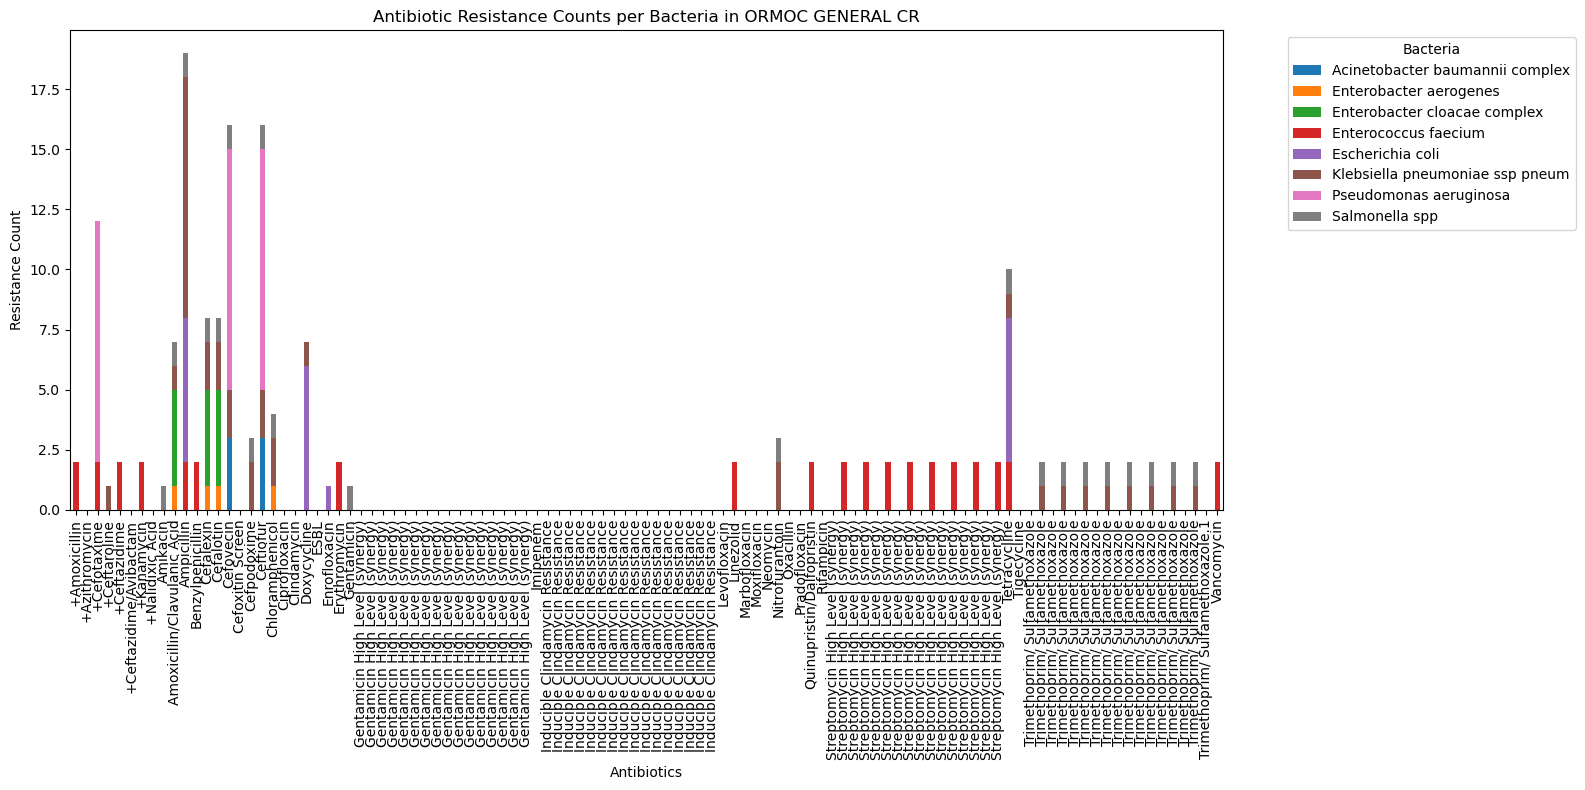

In [96]:
# Re-using the data previously loaded and cleaned for consistency
# Filter rows for "ORMOC GENERAL CR"
df_pedia = df[df['Origin'].str.contains("ORMOC GENERAL CR", case=False, na=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_pedia.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_pedia[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
ormocgeneralcr_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Plotting: Resistance count per bacteria (stacked bar chart)
plt.figure(figsize=(14, 8))
ormocgeneralcr_full_summary.set_index('Bacteria')[antibiotic_cols_all].T.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('Antibiotic Resistance Counts per Bacteria in ORMOC GENERAL CR')
plt.xlabel('Antibiotics')
plt.ylabel('Resistance Count')
plt.legend(title='Bacteria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ORMOC GENERAL ER

In [97]:
import pandas as pd

# Load the dataset
df = pd.read_excel("/Users/User/Downloads/AMR_merged_all_samples_ordered.xlsx")

# Standardize column names
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace(r'\s+', ' ', regex=True)

# Filter hallway rows (adjust the filter based on actual content!)
df_hallway = df[df['Origin'].str.contains("ORMOC GENERAL ER", case=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_hallway.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_hallway[antibiotic_cols_all].apply(lambda col: col.map(lambda x: 1 if x == 'R' else 0))

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_hallway[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
ormocgeneraler_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Display or save
print(ormocgeneraler_full_summary)

                          Bacteria  Isolates Count  +Amoxicillin  \
0  Acinetobacter baumannii complex               9             1   
1     Enterobacter cloacae complex              12             0   
2           Pseudomonas aeruginosa               1             0   
3            Staphylococcus aureus               1             1   

   +Azithromycin  +Cefotaxime  +Ceftaroline  +Ceftazidime  \
0              0            1             0             1   
1              0            0             0             0   
2              0            1             0             0   
3              0            1             0             1   

   +Ceftazidime/Avibactam  +Kanamycin  +Nalidixic Acid  ...  \
0                       0           0                0  ...   
1                       0           0                0  ...   
2                       0           0                0  ...   
3                       0           0                0  ...   

   Trimethoprim/ Sulfamethoxazole  Tr

C:\Users\User\AppData\Local\Temp\ipykernel_8560\1133718965.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)


<Figure size 1400x800 with 0 Axes>

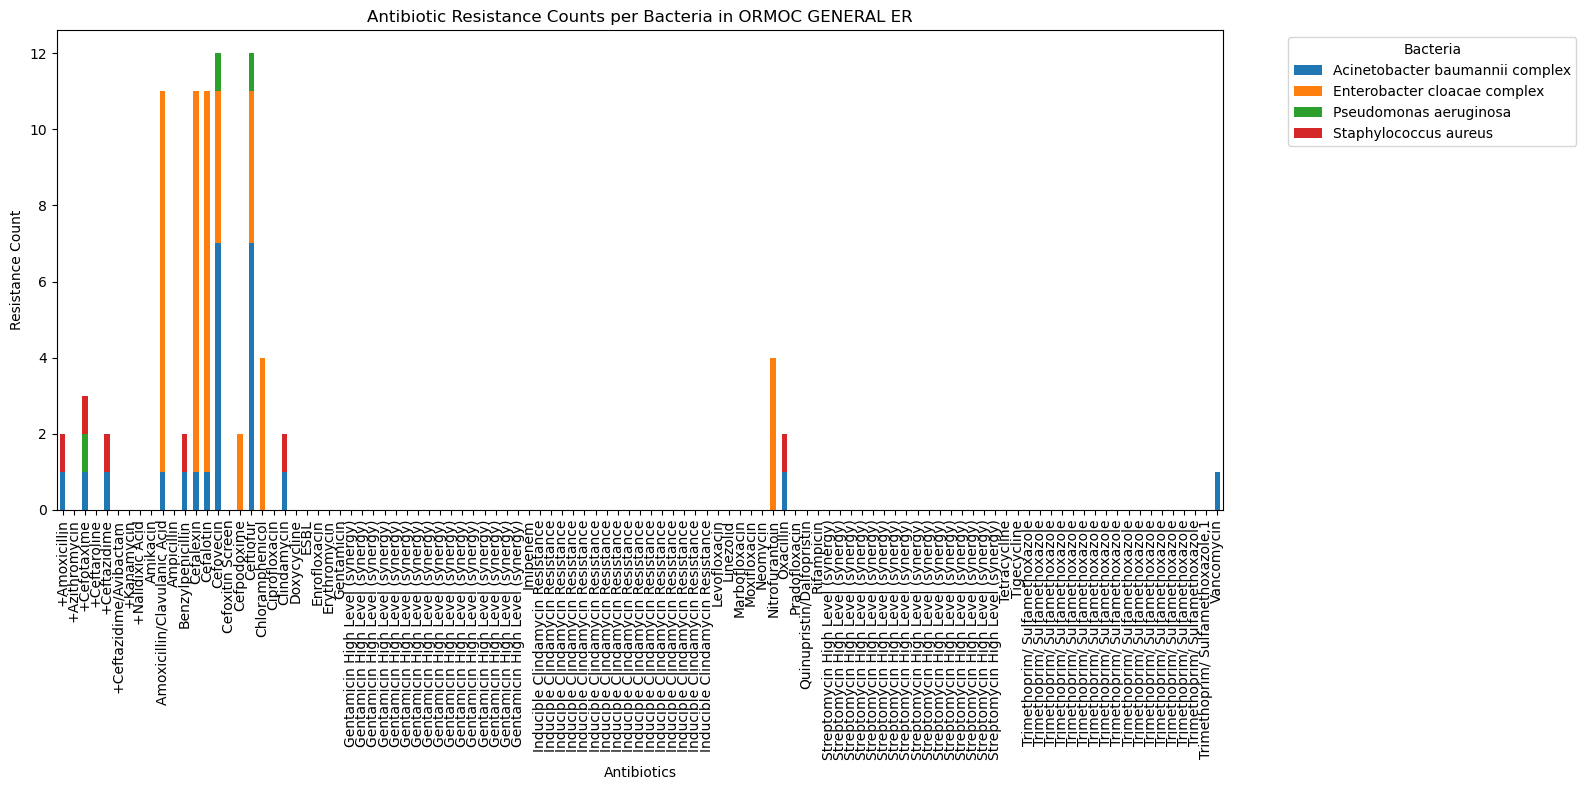

In [98]:
# Re-using the data previously loaded and cleaned for consistency
# Filter rows for "ORMOC GENERAL ER"
df_pedia = df[df['Origin'].str.contains("ORMOC GENERAL ER", case=False, na=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_pedia.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_pedia[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
ormocgeneraler_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Plotting: Resistance count per bacteria (stacked bar chart)
plt.figure(figsize=(14, 8))
ormocgeneraler_full_summary.set_index('Bacteria')[antibiotic_cols_all].T.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('Antibiotic Resistance Counts per Bacteria in ORMOC GENERAL ER')
plt.xlabel('Antibiotics')
plt.ylabel('Resistance Count')
plt.legend(title='Bacteria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ORMOC HALLWAY SUMMARY

In [99]:
import pandas as pd

# Load the dataset
df = pd.read_excel("/Users/User/Downloads/AMR_merged_all_samples_ordered.xlsx")

# Standardize column names
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace(r'\s+', ' ', regex=True)

# Filter hallway rows (adjust the filter based on actual content!)
df_hallway = df[df['Origin'].str.contains("ORMOC HALLWAY", case=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_hallway.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_hallway[antibiotic_cols_all].apply(lambda col: col.map(lambda x: 1 if x == 'R' else 0))

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_hallway[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
ormochallway_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Display or save
print(ormochallway_full_summary)

               Bacteria  Isolates Count  +Amoxicillin  +Azithromycin  \
0  Enterococcus faecium               2             0              0   
1      Escherichia coli               2             0              0   

   +Cefotaxime  +Ceftaroline  +Ceftazidime  +Ceftazidime/Avibactam  \
0            2             0             2                       0   
1            0             0             0                       0   

   +Kanamycin  +Nalidixic Acid  ...  Trimethoprim/ Sulfamethoxazole  \
0           2                0  ...                               0   
1           0                0  ...                               0   

   Trimethoprim/ Sulfamethoxazole  Trimethoprim/ Sulfamethoxazole  \
0                               0                               0   
1                               2                               0   

   Trimethoprim/ Sulfamethoxazole  Trimethoprim/ Sulfamethoxazole  \
0                               0                               0   
1           

C:\Users\User\AppData\Local\Temp\ipykernel_8560\1367906492.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)


<Figure size 1400x800 with 0 Axes>

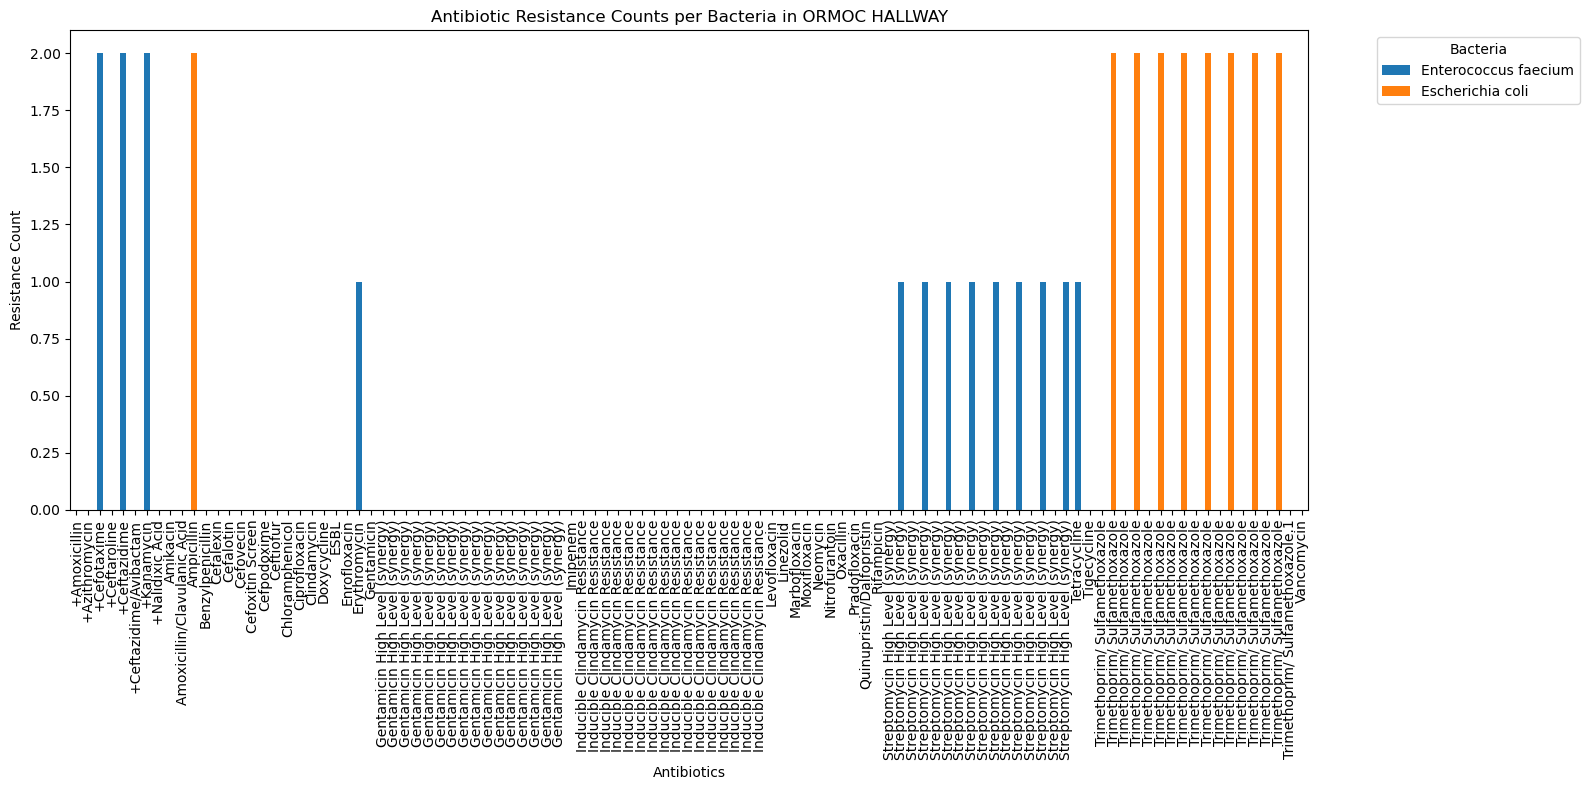

In [100]:
# Re-using the data previously loaded and cleaned for consistency
# Filter rows for "ORMOC HALLWAY"
df_pedia = df[df['Origin'].str.contains("ORMOC HALLWAY", case=False, na=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_pedia.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_pedia[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
ormochallway_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Plotting: Resistance count per bacteria (stacked bar chart)
plt.figure(figsize=(14, 8))
ormochallway_full_summary.set_index('Bacteria')[antibiotic_cols_all].T.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('Antibiotic Resistance Counts per Bacteria in ORMOC HALLWAY')
plt.xlabel('Antibiotics')
plt.ylabel('Resistance Count')
plt.legend(title='Bacteria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


ORMOC MEDICAL WARD SUMMARY

In [101]:
import pandas as pd

# Load the dataset
df = pd.read_excel("/Users/User/Downloads/AMR_merged_all_samples_ordered.xlsx")

# Standardize column names
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace(r'\s+', ' ', regex=True)

# Filter hallway rows (adjust the filter based on actual content!)
df_hallway = df[df['Origin'].str.contains("ORMOC MEDICAL WARD", case=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_hallway.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_hallway[antibiotic_cols_all].apply(lambda col: col.map(lambda x: 1 if x == 'R' else 0))

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_hallway[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
ormocmedicalward_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Display or save
print(generalward_full_summary)

                          Bacteria  Isolates Count  +Amoxicillin  \
0  Acinetobacter baumannii complex               1             0   
1     Enterobacter cloacae complex              20             0   
2            Enterococcus faecalis               1             0   
3  Klebsiella pneumoniae ssp pneum               5             0   
4           Pseudomonas aeruginosa               5             0   

   +Azithromycin  +Cefotaxime  +Ceftaroline  +Ceftazidime  \
0              0            0             0             0   
1              0            0             0             0   
2              0            1             0             1   
3              0            0             0             0   
4              0            5             0             0   

   +Ceftazidime/Avibactam  +Kanamycin  +Nalidixic Acid  ...  \
0                       0           0                0  ...   
1                       0           0                0  ...   
2                       0          

C:\Users\User\AppData\Local\Temp\ipykernel_8560\1721370593.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)


<Figure size 1400x800 with 0 Axes>

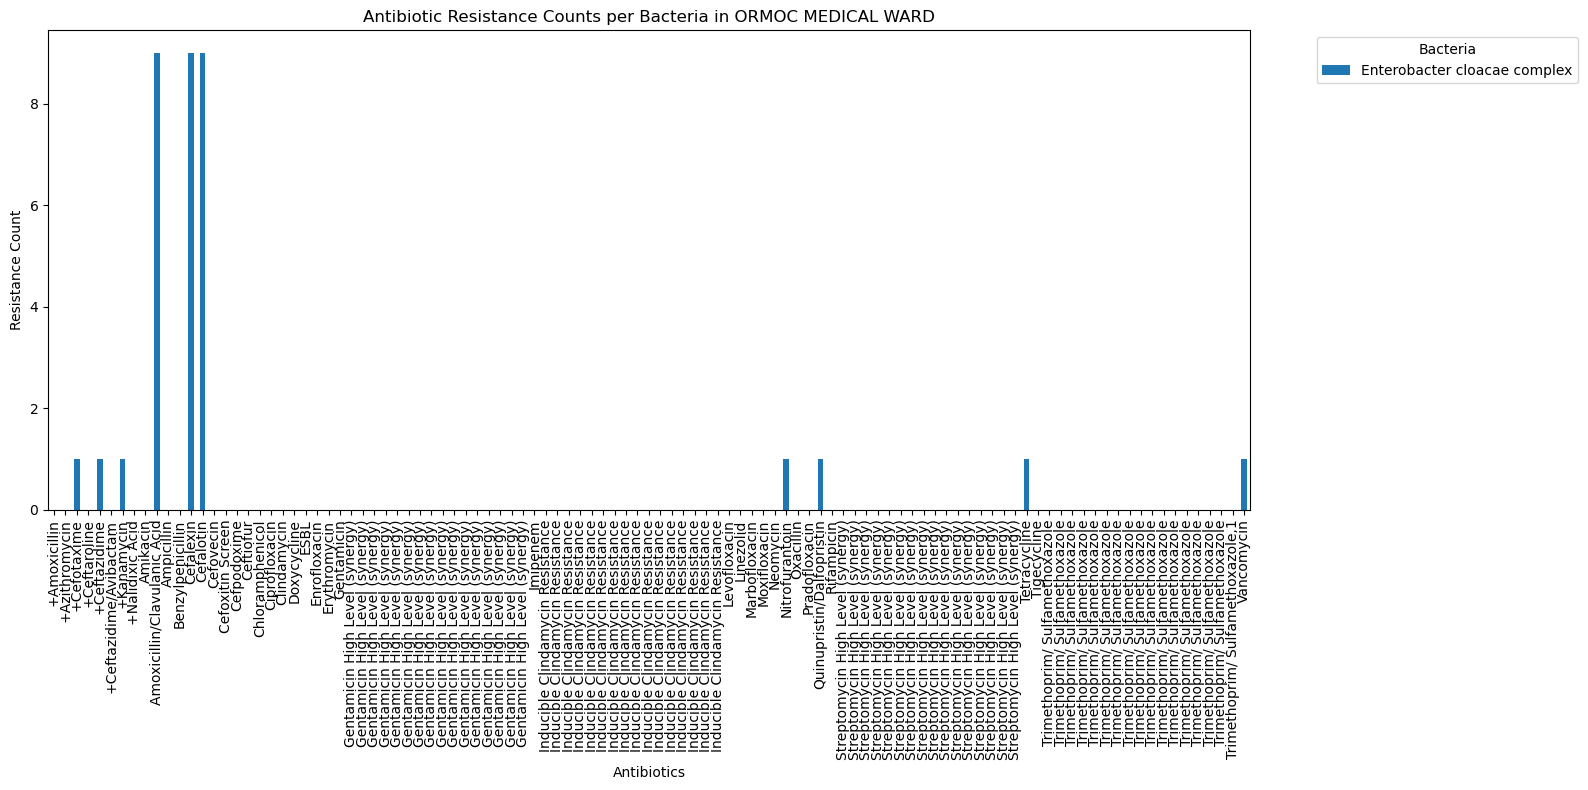

In [102]:
# Re-using the data previously loaded and cleaned for consistency
# Filter rows for "ORMOC MEDICAL WARD"
df_pedia = df[df['Origin'].str.contains("ORMOC MEDICAL WARD", case=False, na=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_pedia.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_pedia[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
ormocmedicalward_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Plotting: Resistance count per bacteria (stacked bar chart)
plt.figure(figsize=(14, 8))
ormocmedicalward_full_summary.set_index('Bacteria')[antibiotic_cols_all].T.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('Antibiotic Resistance Counts per Bacteria in ORMOC MEDICAL WARD')
plt.xlabel('Antibiotics')
plt.ylabel('Resistance Count')
plt.legend(title='Bacteria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


ORMOC PEDIA WARD SUMMARY

In [103]:
import pandas as pd

# Load the dataset
df = pd.read_excel("/Users/User/Downloads/AMR_merged_all_samples_ordered.xlsx")

# Standardize column names
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace(r'\s+', ' ', regex=True)

# Filter hallway rows (adjust the filter based on actual content!)
df_hallway = df[df['Origin'].str.contains("ORMOC PEDIA WARD", case=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_hallway.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_hallway[antibiotic_cols_all].apply(lambda col: col.map(lambda x: 1 if x == 'R' else 0))

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_hallway[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
ormocpediaward_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Display or save
print(ormocpediaward_full_summary)

                          Bacteria  Isolates Count  +Amoxicillin  \
0  Acinetobacter baumannii complex               1             0   
1     Enterobacter cloacae complex               3             0   
2  Klebsiella pneumoniae ssp pneum               1             0   
3            Staphylococcus aureus               1             1   

   +Azithromycin  +Cefotaxime  +Ceftaroline  +Ceftazidime  \
0              0            0             0             0   
1              0            0             0             0   
2              0            0             0             0   
3              0            1             0             1   

   +Ceftazidime/Avibactam  +Kanamycin  +Nalidixic Acid  ...  \
0                       0           0                0  ...   
1                       0           0                0  ...   
2                       0           0                0  ...   
3                       0           0                0  ...   

   Trimethoprim/ Sulfamethoxazole  Tr

C:\Users\User\AppData\Local\Temp\ipykernel_8560\530427667.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)


<Figure size 1400x800 with 0 Axes>

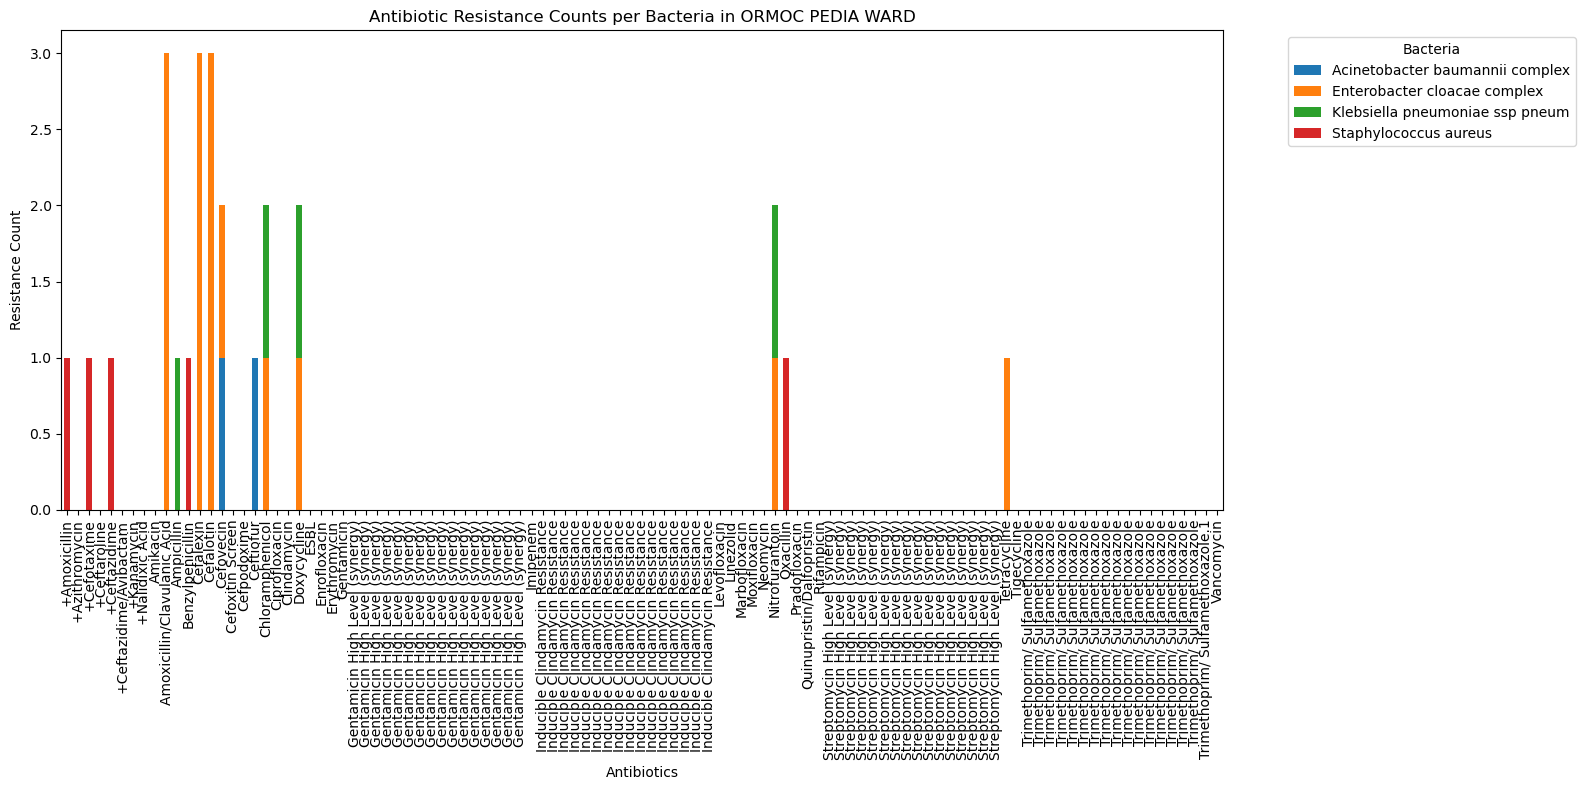

In [104]:
# Re-using the data previously loaded and cleaned for consistency
# Filter rows for "ORMOC PEDIA WARD"
df_pedia = df[df['Origin'].str.contains("ORMOC PEDIA WARD", case=False, na=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_pedia.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_pedia[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
ormocpediaward_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Plotting: Resistance count per bacteria (stacked bar chart)
plt.figure(figsize=(14, 8))
ormocpediaward_full_summary.set_index('Bacteria')[antibiotic_cols_all].T.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('Antibiotic Resistance Counts per Bacteria in ORMOC PEDIA WARD')
plt.xlabel('Antibiotics')
plt.ylabel('Resistance Count')
plt.legend(title='Bacteria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


ORMOC SURGICAL WARD SUMMARY

In [105]:
import pandas as pd

# Load the dataset
df = pd.read_excel("/Users/User/Downloads/AMR_merged_all_samples_ordered.xlsx")

# Standardize column names
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace(r'\s+', ' ', regex=True)

# Filter hallway rows (adjust the filter based on actual content!)
df_hallway = df[df['Origin'].str.contains("ORMOC SURGICAL WARD", case=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_hallway.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_hallway[antibiotic_cols_all].apply(lambda col: col.map(lambda x: 1 if x == 'R' else 0))

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_hallway[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
ormocsurgicalward_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Display or save
print(ormocsurgicalward_full_summary)

                          Bacteria  Isolates Count  +Amoxicillin  \
0  Acinetobacter baumannii complex              14             0   
1     Enterobacter cloacae complex              54             0   
2            Staphylococcus aureus               6             6   

   +Azithromycin  +Cefotaxime  +Ceftaroline  +Ceftazidime  \
0              0            0             0             0   
1              0            0             0             0   
2              1            6             0             6   

   +Ceftazidime/Avibactam  +Kanamycin  +Nalidixic Acid  ...  \
0                       0           0                0  ...   
1                       0           0                0  ...   
2                       0           0                0  ...   

   Trimethoprim/ Sulfamethoxazole  Trimethoprim/ Sulfamethoxazole  \
0                               0                               0   
1                               0                              16   
2                     

C:\Users\User\AppData\Local\Temp\ipykernel_8560\2986905286.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)


<Figure size 1400x800 with 0 Axes>

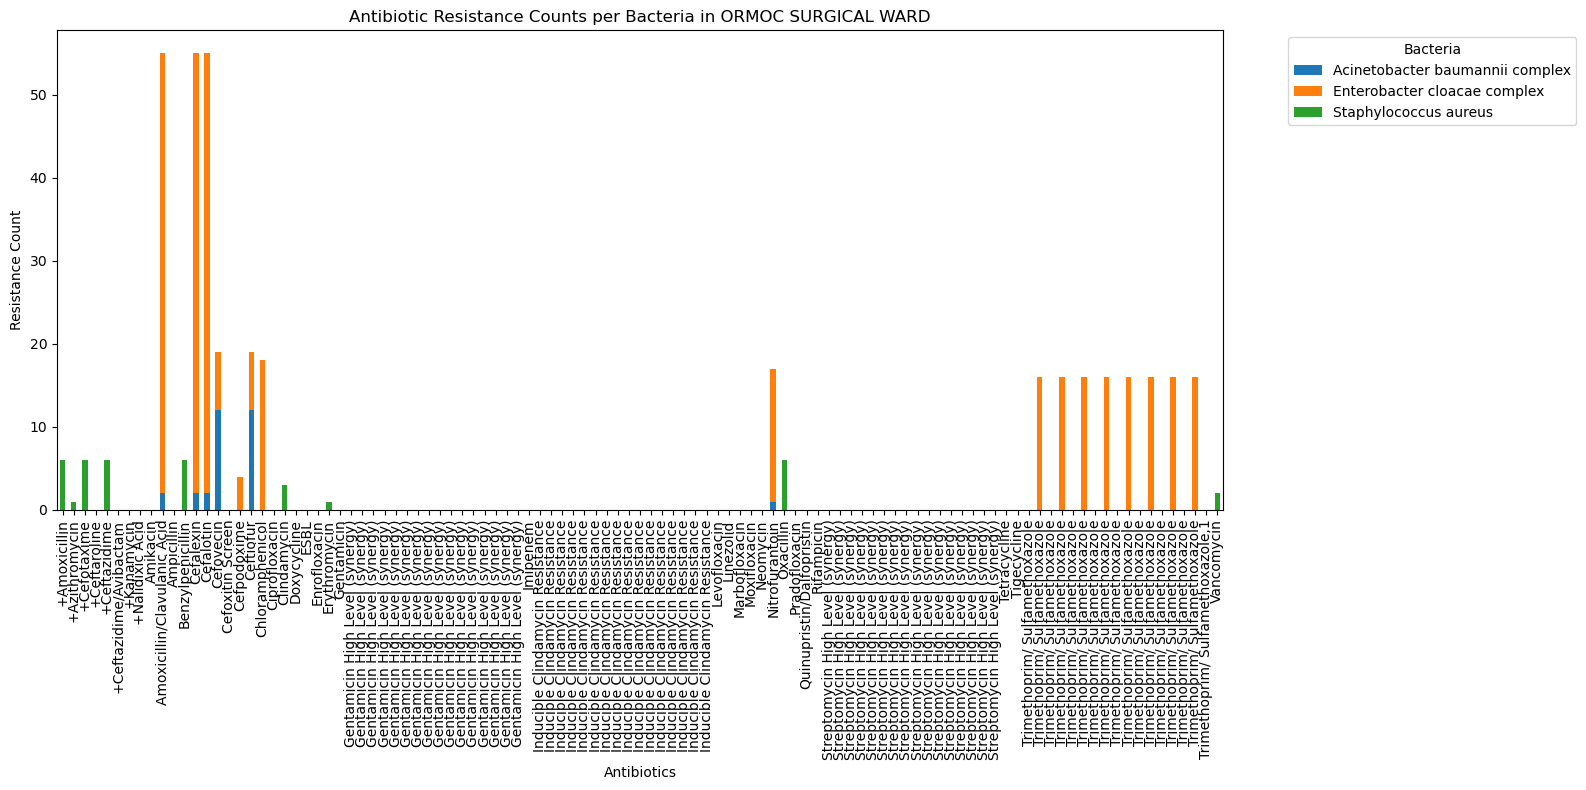

In [106]:
# Re-using the data previously loaded and cleaned for consistency
# Filter rows for "ORMOC SURGICAL WARD"
df_pedia = df[df['Origin'].str.contains("ORMOC SURGICAL WARD", case=False, na=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_pedia.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_pedia[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
ormocsurgicalward_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Plotting: Resistance count per bacteria (stacked bar chart)
plt.figure(figsize=(14, 8))
ormocsurgicalward_full_summary.set_index('Bacteria')[antibiotic_cols_all].T.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('Antibiotic Resistance Counts per Bacteria in ORMOC SURGICAL WARD')
plt.xlabel('Antibiotics')
plt.ylabel('Resistance Count')
plt.legend(title='Bacteria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


ORMOC CR SUMMARY

In [107]:
import pandas as pd

# Load the dataset
df = pd.read_excel("/Users/User/Downloads/AMR_merged_all_samples_ordered.xlsx")

# Standardize column names
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace(r'\s+', ' ', regex=True)

# Filter hallway rows (adjust the filter based on actual content!)
df_hallway = df[df['Origin'].str.contains("ORMOC CR", case=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_hallway.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_hallway[antibiotic_cols_all].apply(lambda col: col.map(lambda x: 1 if x == 'R' else 0))

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_hallway[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
ormoccr_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Display or save
print(ormoccr_full_summary)

               Bacteria  Isolates Count  +Amoxicillin  +Azithromycin  \
0  Enterococcus faecium               2             2              0   

   +Cefotaxime  +Ceftaroline  +Ceftazidime  +Ceftazidime/Avibactam  \
0            2             0             2                       0   

   +Kanamycin  +Nalidixic Acid  ...  Trimethoprim/ Sulfamethoxazole  \
0           2                0  ...                               0   

   Trimethoprim/ Sulfamethoxazole  Trimethoprim/ Sulfamethoxazole  \
0                               0                               0   

   Trimethoprim/ Sulfamethoxazole  Trimethoprim/ Sulfamethoxazole  \
0                               0                               0   

   Trimethoprim/ Sulfamethoxazole  Trimethoprim/ Sulfamethoxazole  \
0                               0                               0   

   Trimethoprim/ Sulfamethoxazole  Trimethoprim/ Sulfamethoxazole.1  \
0                               0                                 0   

   Vancomyc

C:\Users\User\AppData\Local\Temp\ipykernel_8560\1190179039.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)


<Figure size 1400x800 with 0 Axes>

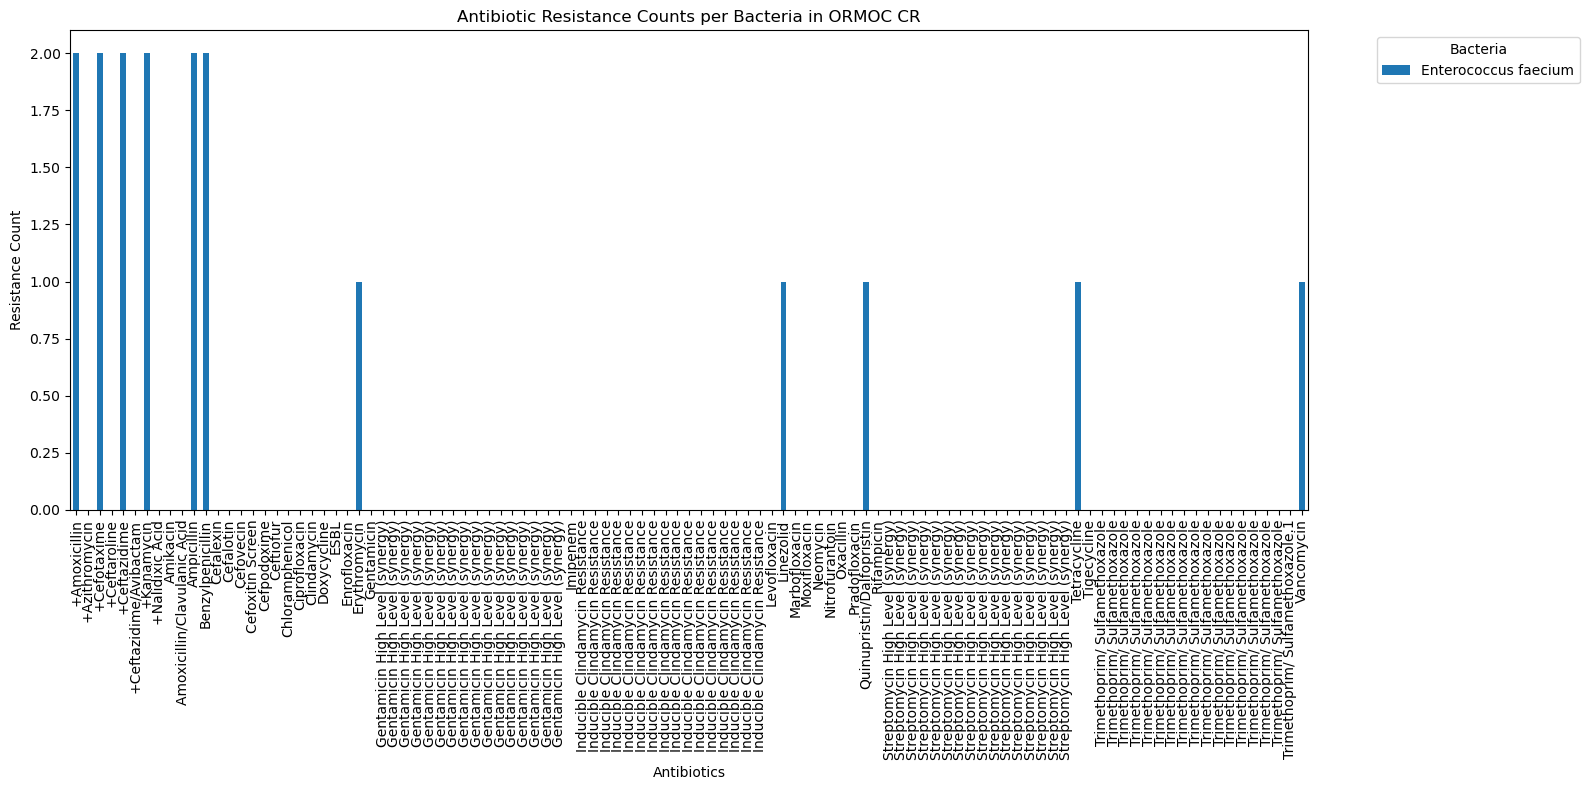

In [108]:
# Re-using the data previously loaded and cleaned for consistency
# Filter rows for "ORMOC CR"
df_pedia = df[df['Origin'].str.contains("ORMOC CR", case=False, na=False)]

# Identify antibiotic-related columns
non_antibiotic_cols = ['Sample_ID', 'Origin', 'Bacteria']
antibiotic_cols_all = [
    col for col in df_pedia.columns
    if col not in non_antibiotic_cols and not col.lower().startswith('unnamed') and not col.lower().startswith('nan')
]

# Encode resistance: R = 1, others = 0
encoded_antibiotics = df_pedia[antibiotic_cols_all].applymap(lambda x: 1 if x == 'R' else 0)

# Combine metadata with encoded resistance
df_encoded = pd.concat([df_pedia[non_antibiotic_cols].reset_index(drop=True), encoded_antibiotics.reset_index(drop=True)], axis=1)

# Count isolates per bacteria
bacteria_counts = df_encoded.groupby('Bacteria').agg({'Sample_ID': 'count'}).rename(columns={'Sample_ID': 'Isolates Count'})

# Sum resistance counts per antibiotic
resistance_summary_all = df_encoded.groupby('Bacteria')[antibiotic_cols_all].sum()

# Merge into final summary
ormoccr_full_summary = pd.concat([bacteria_counts, resistance_summary_all], axis=1).reset_index()

# Plotting: Resistance count per bacteria (stacked bar chart)
plt.figure(figsize=(14, 8))
ormoccr_full_summary.set_index('Bacteria')[antibiotic_cols_all].T.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('Antibiotic Resistance Counts per Bacteria in ORMOC CR')
plt.xlabel('Antibiotics')
plt.ylabel('Resistance Count')
plt.legend(title='Bacteria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
